In [1]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

from tqdm import tqdm

In [2]:
X_train = np.array(pd.read_csv('emnist-byclass-train.csv', header=None).loc[:, 1:]) / 255.0
y_train = np.array(pd.read_csv('emnist-byclass-train.csv', header=None).loc[:, 0])

X_test = np.array(pd.read_csv('emnist-byclass-test.csv', header=None).loc[:, 1:]) / 255.0
y_test = np.array(pd.read_csv('emnist-byclass-test.csv', header=None).loc[:, 0])

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(697932, 784) (697932,) (116323, 784) (116323,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(697932, 28, 28) (697932,) (116323, 28, 28) (116323,)


In [6]:
k = len(X_train)
for t in range(k):
    X_train[t]=np.transpose(X_train[t])

k = len(X_test)
for t in range(k):
    X_test[t]=np.transpose(X_test[t])

print('Process Complete: Rotated and reversed test and train images!')

Process Complete: Rotated and reversed test and train images!


In [7]:
X_train_flat = X_train.reshape(X_train.shape[0], 784,1)
X_test_flat = X_test.reshape(X_test.shape[0], 784,1)

In [8]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = X_train_flat.astype('float32')
test_images = X_test_flat.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)

K.set_learning_phase(1)
model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))

#add the layer below for an accuracy of 89%.(Training time - over 20 hours)
#model.add(Convolution2D(32, (5,5), input_shape=(28,28,1), activation='relu',padding='same', kernel_constraint=maxnorm(3)))
model.add(Convolution2D(32, (5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

#opt = optimizers.Adadelta()
opt = tf.keras.optimizers.SGD(learning_rate=0.002)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/Users/vasudhanvarma/miniforge3/lib/python3.9/site-packages/keras/backend.py:401: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
2021-11-22 20:35:27.251171: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-22 20:35:27.252274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [9]:
print(model.summary())
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 62)                3

2021-11-22 20:37:44.759582: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 20:37:44.792906: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
   1/5453 [..............................] - ETA: 43:38 - loss: 4.1165 - accuracy: 0.0234

2021-11-22 20:37:45.253422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5453/5453 [==============================] - ETA: 0s - loss: 1.9398 - accuracy: 0.5190

2021-11-22 20:38:50.557494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5453/5453 [==============================] - 72s 13ms/step - loss: 1.9398 - accuracy: 0.5190 - val_loss: 1.1067 - val_accuracy: 0.6940
Epoch 2/20
5453/5453 [==============================] - 83s 15ms/step - loss: 1.1704 - accuracy: 0.6720 - val_loss: 0.8930 - val_accuracy: 0.7415
Epoch 3/20
5453/5453 [==============================] - 117s 21ms/step - loss: 1.0170 - accuracy: 0.7083 - val_loss: 0.8003 - val_accuracy: 0.7635
Epoch 4/20
5453/5453 [==============================] - 117s 22ms/step - loss: 0.9325 - accuracy: 0.7279 - val_loss: 0.7442 - val_accuracy: 0.7750
Epoch 5/20
5453/5453 [==============================] - 127s 23ms/step - loss: 0.8771 - accuracy: 0.7413 - val_loss: 0.7014 - val_accuracy: 0.7851
Epoch 6/20
5453/5453 [==============================] - 135s 25ms/step - loss: 0.8355 - accuracy: 0.7514 - val_loss: 0.6696 - val_accuracy: 0.7924
Epoch 7/20
5453/5453 [==============================] - 4489s 823ms/step - loss: 0.8029 - accuracy: 0.7585 - val_loss: 0.6472 - val

In [10]:
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 82.73%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


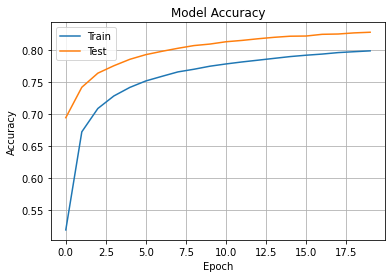

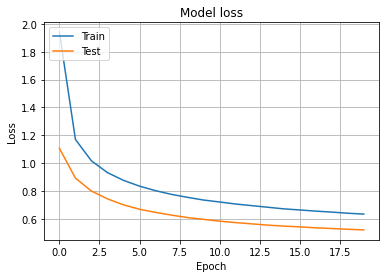

In [11]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

In [14]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("modelsgd.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("modelsgd.h5")